### CNN in KERAS FOR MNIST CLASSIFIER

In [2]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


##### here we have three color channels 

In [4]:
print('dimensions of X_train:' + str(X_train[0].shape))
print('dimensions of X_test:' + str(X_test[0].shape))

dimensions of X_train:(28, 28)
dimensions of X_test:(28, 28)


In [5]:
print('labels in y_train:{}'.format(y_train.shape))
print('labels in y_test:{}'.format(y_test.shape))

labels in y_train:(60000,)
labels in y_test:(10000,)


### PLOTTING IMAGES WITH MATPLOTLIB 

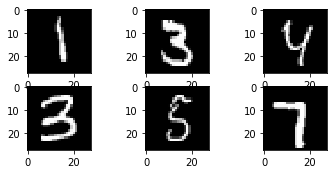

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# plt.subplot(331)
# random_num = np.random.randint(0,len(X_train))
# plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

for i in range(1,7):
    plt.subplot(330+i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()
    

### STEP 3A = Prepare our dataset for training

In [7]:
# lets store the number of rows and columns
print(X_train.shape)
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
print(str(img_cols) + "," + str(img_rows))

(60000, 28, 28)
28,28


Getting data into right shape, we will add 4th dimension in the data, thus changing image from (600000,28,28) to (60000,28,28,1)

In [8]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

In [10]:
# change image from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

##### normalize data changing its range from (0,255) to (0,1)

In [11]:
X_train /= 255
X_test /= 255

In [12]:
print('x_train_shape: {}'.format(X_train.shape))
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train_shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### USE ONE HOT ENCODER TO CHANGE LABEL FOR CLASSIFIERS

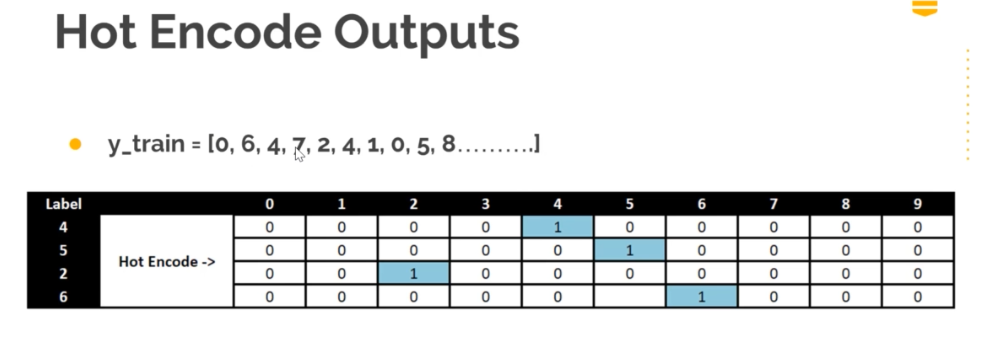

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('num of classes: ' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixel = X_train.shape[1] * X_train.shape[2]

num of classes: 10


In [21]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## BUILD MODEL
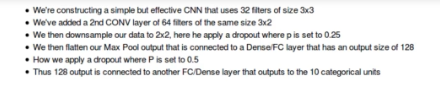

In [16]:
# import keras model libraries
from tensorflow import keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

## TRAIN THE MODEL 

In [22]:
batch_size = 32
epochs = 10

history = model.fit(X_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('test loss ', score[0])
print('test accuracy ', score[1])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1856/1875 [============================>.] - ETA: 0s - loss: 0.5701 - accuracy: 0.8225WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff4941193b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

## PLOT LOSS AND ACCURACY CHARTS 

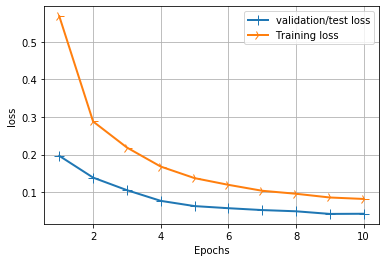

In [25]:
import matplotlib.pyplot as plt


# history.history stores a history dictionary
history_dict = history.history

loss_val = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_val) + 1)

line1 = plt.plot(epochs, val_loss_values, label='validation/test loss')
line2 = plt.plot(epochs, loss_val, label='Training loss')
plt.setp(line1, linewidth=2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

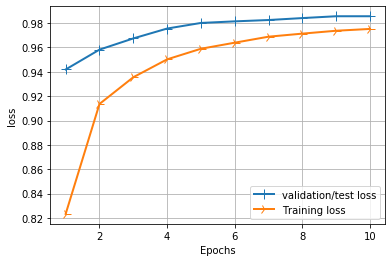

In [30]:
import matplotlib.pyplot as plt


# history.history stores a history dictionary
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(loss_val) + 1)

line1 = plt.plot(epochs, val_acc_values, label='validation/test loss')
line2 = plt.plot(epochs, acc_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

##### validation acc is higher than training meaning generalizing really well 

## SAVE MODEL 

In [31]:
model.save('../checkpoints/mnist_cnn_10_epochs.h5')
print('model saved')

model saved


## LOAD MODEL 

In [32]:
from tensorflow.keras.models import load_model

classifier = load_model('../checkpoints/mnist_cnn_10_epochs.h5')
print('model loaded')

model loaded


#### inputting some test data into classifier 

## VISUALISE MODEL 

In [33]:
from tensorflow.keras.utils import plot_model

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [35]:
import matplotlib.image as mpimg

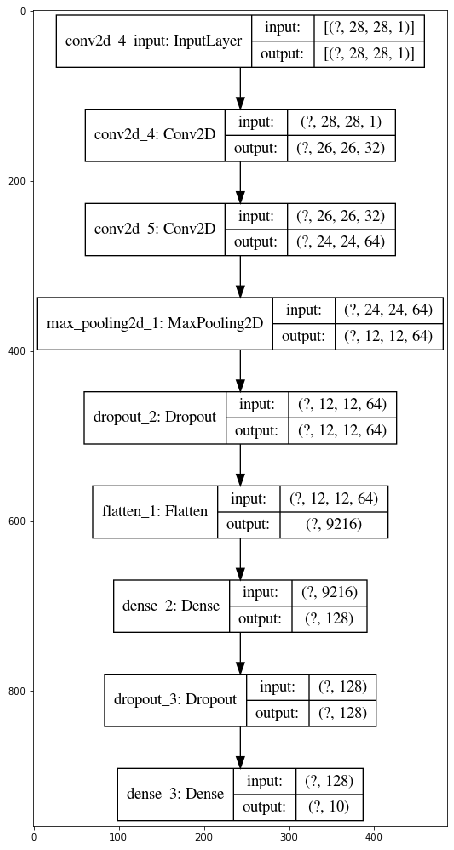

In [37]:
model_diagram_path = ""

# generate the plot
plot_model(model, to_file=model_diagram_path + "digit_classifier_model.png",
          show_shapes = True,
          show_layer_names = True)

img = mpimg.imread(model_diagram_path + "digit_classifier_model.png")
plt.figure(figsize=(30,15))
implot = plt.imshow(img)